## 00_Start_EDA
### EDA 시작하기

>### 01. 라이브러리 가져오기 Import Libraries
>### 02. 데이터 불러오기 Load Data
>### 03. 데이터 탐색하기 Explore Data
>### 04. 기술통계량 계산하기 Descriptive Statistics
>### 05. 단변량 분석 Univariate Analysis
>### 06. 이변량 분석 Bivariate Analysis
>### 07. 다변량 분석 Multivariate Analysis
>### 08. 이상치 탐지 Outlier Detection
>### 09. 데이터 변환 Data Transformation
>### 10. 결론 Conclusion

---

## 목적 1 : 치아 우식증에 영향을 주는 요인분석 및 이에 따른 합병증 문제
## 목적 2 : 나이대별 건강 통계분석

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 

import warnings
warnings.filterwarnings('ignore')

- 데이터 조작 및 분석을 위해 pandas 라이브러리를 불러옴
- 수치 계산을 위해 Numpy 라이브러리를 불러옴
- 그래프와 플롯을 만들기 위해 Matplotlib과 seaborn 라이브러리를 불러옴
- 결측치 확인을 위해 missingno 라이브러리를 불러옴

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

In [2]:
nh= pd.read_csv('C:/Users/jisoo/Documents/분석 과제/data/nhis_nhcp_info_20211229.CSV', encoding = 'cp949')

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [3]:
nh.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
nh.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
999999,2020,1000000,28,1,11,160,55,76.1,2.0,2.0,...,0.9,17.0,13.0,24.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
nh_eng = nh.copy()

In [6]:
nh_eng = nh_eng.rename(columns={
    '기준년도': 'HCHK_YEAR',
    '가입자 일련번호': 'IDV_ID',
    '시도코드': 'SIDO',
    '성별코드': 'SEX',
    '연령대 코드(5세단위)': 'AGE_GROUP',
    '신장(5Cm단위)': 'HEIGHT',
    '체중(5Kg 단위)': 'WEIGHT',
    '허리둘레': 'WAIST',
    '시력(좌)': 'SIGHT_LEFT',
    '시력(우)': 'SIGHT_RIGHT',
    '청력(좌)': 'HEAR_LEFT',
    '청력(우)': 'HEAR_RIGHT',
    '수축기 혈압': 'BP_HIGH',
    '이완기 혈압': 'BP_LWST',
    '식전혈당(공복혈당)': 'BLDS',
    '총 콜레스테롤': 'TOT_CHOLE',
    '트리글리세라이드': 'TRIGLYCERIDE',
    'HDL 콜레스테롤': 'HDL_CHOLE',
    'LDL 콜레스테롤': 'LDL_CHOLE',
    '혈색소': 'HMG',
    '요단백': 'OLIG_PROTE_CD',
    '혈청크레아티닌': 'CREATININE',
    '(혈청지오티)AST': 'SGOT_AST',
    '(혈청지오티)ALT': 'SGOT_ALT',
    '감마 지티피': 'GAMMA_GTP',
    '흡연상태': 'SMK_STAT_TYPE_CD',
    '음주여부': 'DRK_YN',
    '구강검진 수검여부': 'HCHK_OE_INSPEC_YN',
    '치아우식증유무': 'CRS_YN',
    '치석': 'TTR_YN',
    '데이터 공개일자': 'DATA_STD_DT'
})

In [7]:
nh_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999892 non-null   float64
 8   SIGHT_LEFT         999743 non-null   float64
 9   SIGHT_RIGHT        999748 non-null   float64
 10  HEAR_LEFT          999778 non-null   float64
 11  HEAR_RIGHT         999770 non-null   float64
 12  BP_HIGH            992468 non-null   float64
 13  BP_LWST            992466 non-null   float64
 14  BLDS               992398 non-null   float64
 15  TOT_CHOLE          402306 non-nul

In [8]:
print("데이터 모형 \t", nh.shape)

print("\n컬럼별 타입")
print(nh.dtypes)

print("\n컬럼별 null값 존재여부")
print(nh.isnull().sum())

print("\n기준년도 목록 값")
print(list(set(nh['기준년도'])))

print("\n시도코드 목록")
print(list(set(nh['시도코드'])))

print("\n성별코드 목록 값")
print(list(set(nh['성별코드'])))

print("\n연령대 코드(5세단위) 목록 값")
print(list(set(nh['연령대 코드(5세단위)'])))

print("\n신장(5Cm단위)  목록 값")
print(list(set(nh['신장(5Cm단위)'])))

print("\n체중(5Kg 단위) 목록 값")
print(list(set(nh['체중(5Kg 단위)'])))

print("\n청력(좌)")
print(list(set(nh['청력(좌)'])))

print("\n청력(우)")
print(list(set(nh['청력(우)'])))

print("\n데이터 공개일자")
print(list(set(nh['데이터 공개일자'])))

데이터 모형 	 (1000000, 31)

컬럼별 타입
기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

컬럼별 null값 존재여부
기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)      

<AxesSubplot:>

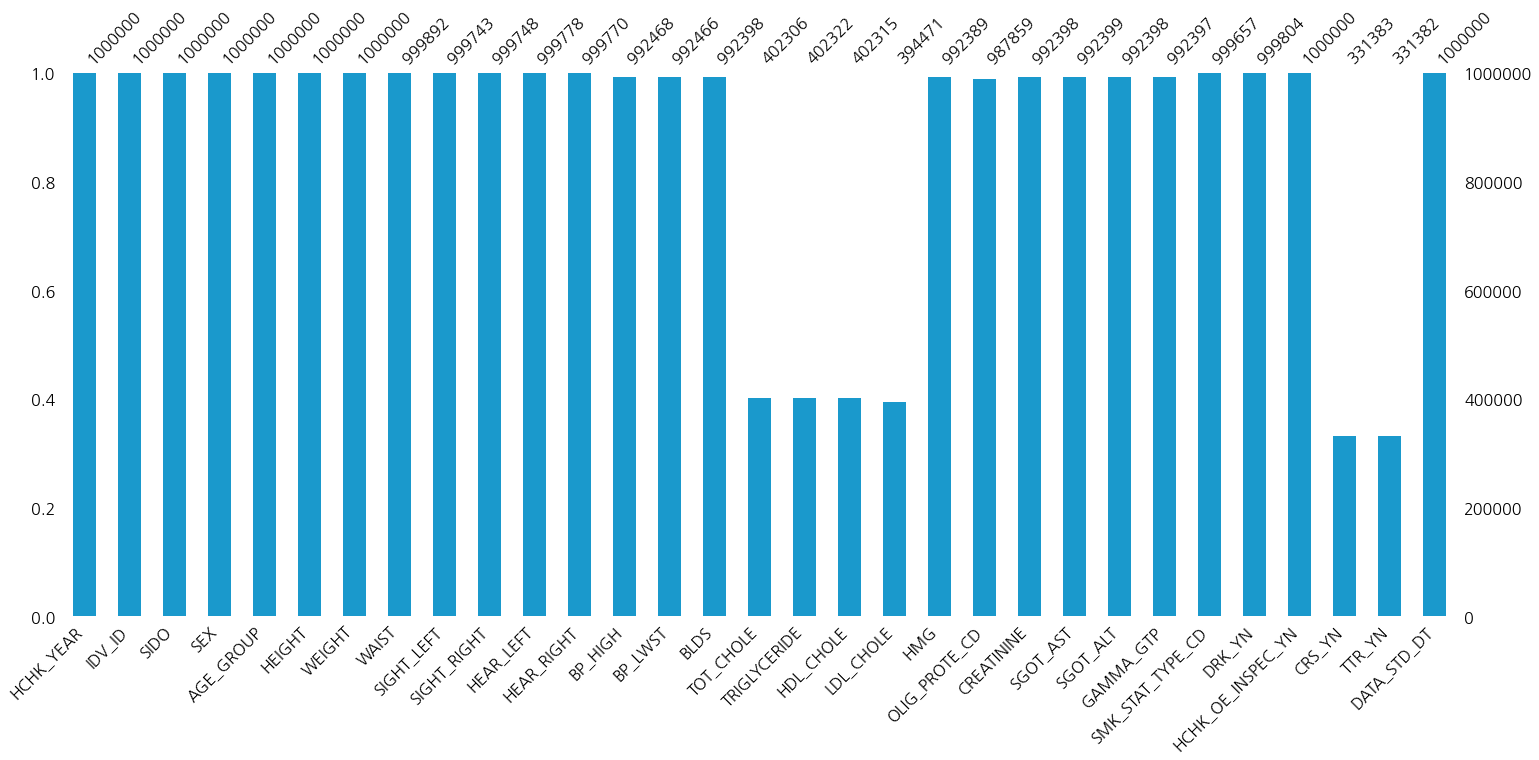

In [9]:
# 결측치
msno.bar(df=nh_eng,  color=(0.1, 0.6, 0.8))

In [10]:
nh_eng.iloc[:,2:-1]

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
0,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
4,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,...,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,41,2,13,145,55,81.0,0.9,1.0,1.0,1.0,...,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN
999996,26,2,12,160,55,76.5,1.5,1.5,1.0,1.0,...,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN
999997,48,1,9,175,70,85.0,1.2,1.2,1.0,1.0,...,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN
999998,48,2,9,160,70,91.0,0.6,0.5,1.0,1.0,...,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN


## ydata profiling
- ydata profiling은 데이터의 기초 통계량을 쉽고 빠르게 파악할 수 있으며, 데이터의 누락값, 중복값, 이상치 등을 간편하게 탐지할 수 있다.
- 또한, 변수 간 상관 관계나 분포의 형태 등을 쉽게 시각화하여 파악할 수 있어 데이터 전반적인 특성 파악에 유용함.

- 하지만, ydata profiling은 데이터의 크기가 크거나 복잡한 경우에는 시간이 많이 소요될 수 있음.
위의 경우에도 변수의 개수가 많다보니 시간이 굉장히 많이 소요됨.

In [11]:
#from ydata_profiling import ProfileReport
#ProfileReport(nh_eng.iloc[:,2:-1])

- 허리둘레의 최댓값 999값은 이상치인듯 하다.
- 허리둘레 항목은 아래의 콜레스테롤 항목처럼 2002년과 2007년까지 결측 처리되었다고 매뉴얼에는 적혀있으나,
- 정작 데이터에는 결측치가 전체 데이터에서 0.1% 미만이다.

- 시력(좌)와 시력(우) : 0.1~2.5 사이의 값으로 표기, 0.1 이하의 시력은 0.1, 실명은 9.9
- 청력(좌)와 청력(우) : 1(정상), 2(비정상)

- 식전 혈당의 최대값이 950이고 최솟값이 0이다. 현실적이지 못한 수치이다.
- 식전 혈당의 95%수치는 145 
- 식전 혈당 126 넘어가면 당뇨

- 총 콜레스테롤 : 정상치가 150 ~ 250. 데이터의 95%수치가 269. 1000, 2000 이런 수치는 현실적이지 않은 수치
- 트리글리세라이드 : 정상치는 30 ~ 130. 데이터의 95%수치가 294. 최댓값이 6999임. 1000을 넘어가는 이런 수치는 현실적이지 않음
- HDL 콜레스테롤 정상치는 30 ~ 65 , 95%수치가 83임. 최댓값 960 현실적이지 않은 수치
- LDL 콜레스테롤 170 이상이면 고LDL혈증으로 봄. 95% 수치가 179, 최댓값 2395, 현실적이지 않은 수치들이 있음

- 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤, 혈청크레아티닌은 결측치가 거의 60%이다. 
- 2008년 부터 건강검진 문진항목으로 추가되었기에 2002년부터 2007년 까지는 결측 처리 됨

- 혈색소 남성 정상수치 : 13.5-17.5g/dL 여성 정상수치 : 12.5-15.5g/dL 
- 요단백 : 소변에 단백질이 섞여 나오는 것, 1(-), 2(+-), 3(+1), 4(+2), 5(+3), 6(+4)
- 혈청크레아티닌 : 혈청 크레아티닌은 혈액검사를 통해 신장 기능을 평가하려 할 때 이용, 정상치 0.8 ~ 1.7
- 혈청크레아티닌의 95%수치가 1.2인데 최댓값이 95이다. 현실적이지 않은 수치이다.

- (혈청지오티)AST, (혈청지오티)ALT : 간세포가 손상될 때 나오는 효소이므로 수치가 높을수록 간기능이 떨어진다는 뜻, 정상치 0 ~ 40
- (혈청지오티)AST의 95% 수치가 49인데 최대값이 8712이다. 
- (혈청지오티)ALT의 95% 수치가 59인데 최대값이 5990이다.이상치임.
- 감마 지티피 : 알코올에 의한 간장애의 지표가 되는 검사, 정상치 : 남성 11 ~ 63, 여성 8 ~ 35
- 감마 지티피의 95%수치가 104인데 최대값이 2630이다. 이상치임.

- 흡연상태 : 1(피우지 않음), 2(이전에 피웠으나 끊음), 3(현재도 피움)
- 음주여부 : 0(마시지 않음), 1(마심)

- 구강검진 수검여부 : 0(미수검), 1(수검), 0(미수검)이 66.9%, 1(수검)이 33.1%
- 구강검진 수검여부에서 1(수검)인 33.1% 만 아래 검사결과가 존재
- 치아우식증유무 : 0(없음), 1(있음)
- 치아마모증 유무 : 0(없음), 1(있음)
- 치석 : 0(없음), 1(있음) 이라고 매뉴얼에는 표기되어있으나 매뉴얼에는 존재하지 않는 수치 2가 1.7% 존재함. 

### 04. 기술통계량 계산하기 Descriptive Statistics
- 데이터셋을 요약하기 위해 일부 기술통계량을 계산합니다.

In [12]:
nh_eng.iloc[:,3:-1].describe()

,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,999778.000000,999770.000000,992468.000000,...,987859.000000,992398.000000,992399.000000,992398.000000,992397.000000,999657.000000,999804.000000,1000000.000000,331383.00000,331382.000000
mean,1.489311,11.917757,160.964085,63.060790,82.357094,0.933045,0.935036,1.046334,1.044071,124.831874,...,1.122333,0.851984,27.698337,26.759641,37.778292,1.557421,0.584800,0.331384,0.16859,0.584661
std,0.499886,2.171036,9.197899,12.269907,9.622632,0.637453,0.644911,0.218147,0.212804,14.751504,...,0.493386,0.369630,25.286659,25.835091,51.815871,0.783742,0.492757,0.470711,0.37439,0.589833
min,1.000000,9.000000,130.000000,30.000000,5.800000,0.100000,0.100000,1.000000,1.000000,64.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,...,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,...,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.00000,1.000000
75%,2.000000,13.000000,170.000000,70.000000,89.000000,1.200000,1.200000,1.000000,1.000000,134.000000,...,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,260.000000,...,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,1.00000,2.000000


- 위 결과에서, count, mean, std, min, 25%, 50%, 75%, max는 각각 데이터 개수, 평균, 표준편차, 최소값, 1사분위수, 중앙값, 3사분위수, 최대값을 의미함.

In [13]:
sido = {11:'서울특별시',26:'부산광역시', 27:'대구광역시', 28:'인천광역시',
        29:'광주광역시', 30:'대전광역시', 31:'울산광역시', 36:'세종특별자치시', 
        41:'경기도', 42:'강원도', 43:'충청북도', 44:'충청남도', 45:'전라북도',
        46:'전라남도', 47:'경상북도', 48:'경상남도', 49:'제주특별자치도'}

In [14]:
sido_val=nh['시도코드'].value_counts().to_frame()
sido_val=sido_val.reset_index().rename(columns ={'index':'시도코드','시도코드':'건수'})
sido_df = pd.DataFrame(list(sido.items()), columns=['시도코드', '시도명'])
pd.merge(sido_df, sido_val, on='시도코드', how='inner')

,시도코드,시도명,건수
0,11,서울특별시,166231
1,26,부산광역시,69025
2,27,대구광역시,48413
3,28,인천광역시,58345
4,29,광주광역시,28532
5,30,대전광역시,30057
6,31,울산광역시,26001
7,36,세종특별자치시,6460
8,41,경기도,247369
9,42,강원도,32023


In [15]:
print(nh['성별코드'].value_counts())

1    510689
2    489311
Name: 성별코드, dtype: int64


In [16]:
nh['연령대 코드(5세단위)'].value_counts().sort_index()

9     156277
10    144165
11    175705
12    142089
13    155096
14     86653
15     73714
16     36663
17     23401
18      6237
Name: 연령대 코드(5세단위), dtype: int64

In [17]:
nh['신장(5Cm단위)'].value_counts().sort_index()

130       379
135      2053
140     12373
145     50044
150    128555
155    181306
160    184993
165    179352
170    152585
175     79531
180     24312
185      4096
190       394
195        27
Name: 신장(5Cm단위), dtype: int64

In [18]:
nh['체중(5Kg 단위)'].value_counts().sort_index()

30        514
35       2939
40      16966
45      59642
50     124189
55     155762
60     158678
65     146024
70     123932
75      90047
80      56472
85      31641
90      16392
95       8414
100      4144
105      2112
110      1058
115       545
120       268
125       142
130        87
135        32
Name: 체중(5Kg 단위), dtype: int64

### 05. 단변량 분석 Univariate Analysis
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)

In [19]:
sns.set(rc={'figure.figsize':(12,4)})

<AxesSubplot:>

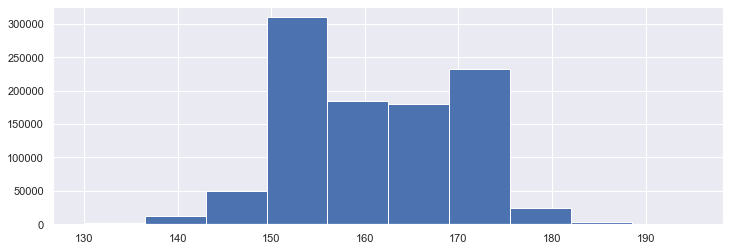

In [20]:
nh_eng['HEIGHT'].hist()

<AxesSubplot:xlabel='TOT_CHOLE', ylabel='Count'>

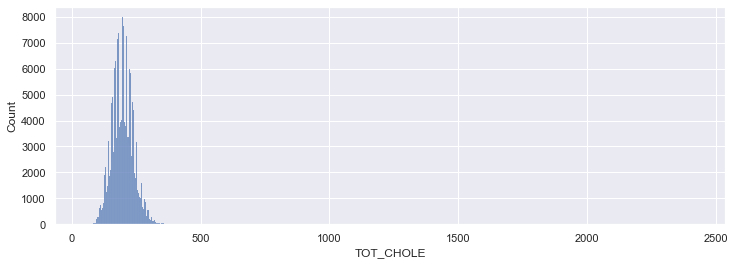

In [21]:
sns.histplot(nh_eng['TOT_CHOLE'].dropna())

<AxesSubplot:xlabel='BP_HIGH'>

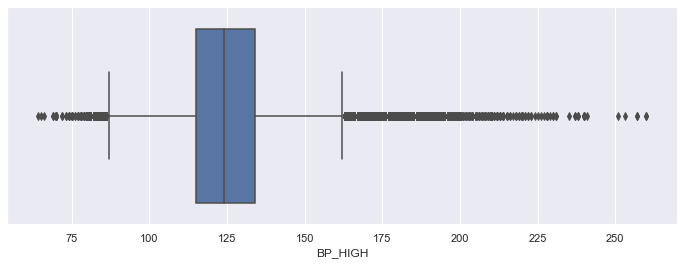

In [22]:
sns.boxplot(nh_eng['BP_HIGH'])

<AxesSubplot:xlabel='BP_LWST'>

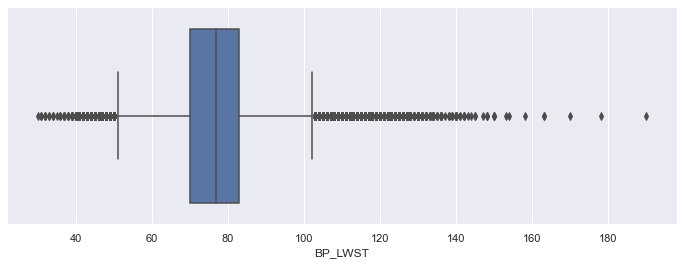

In [23]:
sns.boxplot(nh_eng['BP_LWST'])

<AxesSubplot:xlabel='AGE_GROUP'>

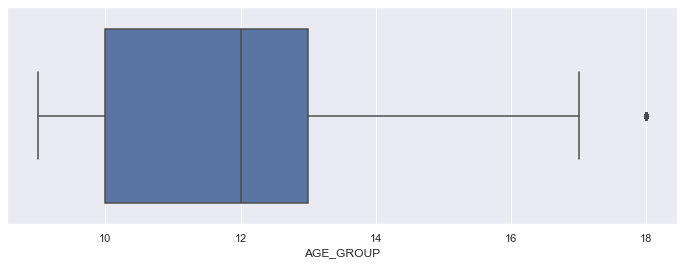

In [24]:
sns.boxplot(nh_eng['AGE_GROUP'])

<AxesSubplot:xlabel='WAIST'>

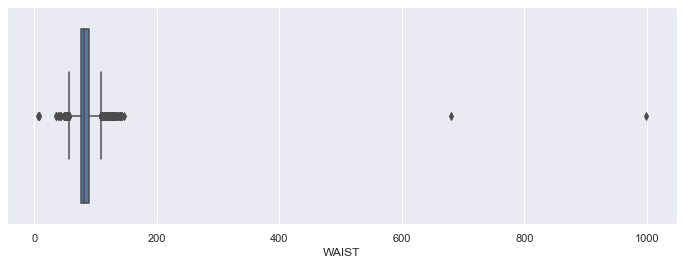

In [25]:
sns.boxplot(nh_eng['WAIST'])

### 06. 이변량 분석 Bivariate Analysis
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.

<AxesSubplot:xlabel='TOT_CHOLE', ylabel='BP_HIGH'>

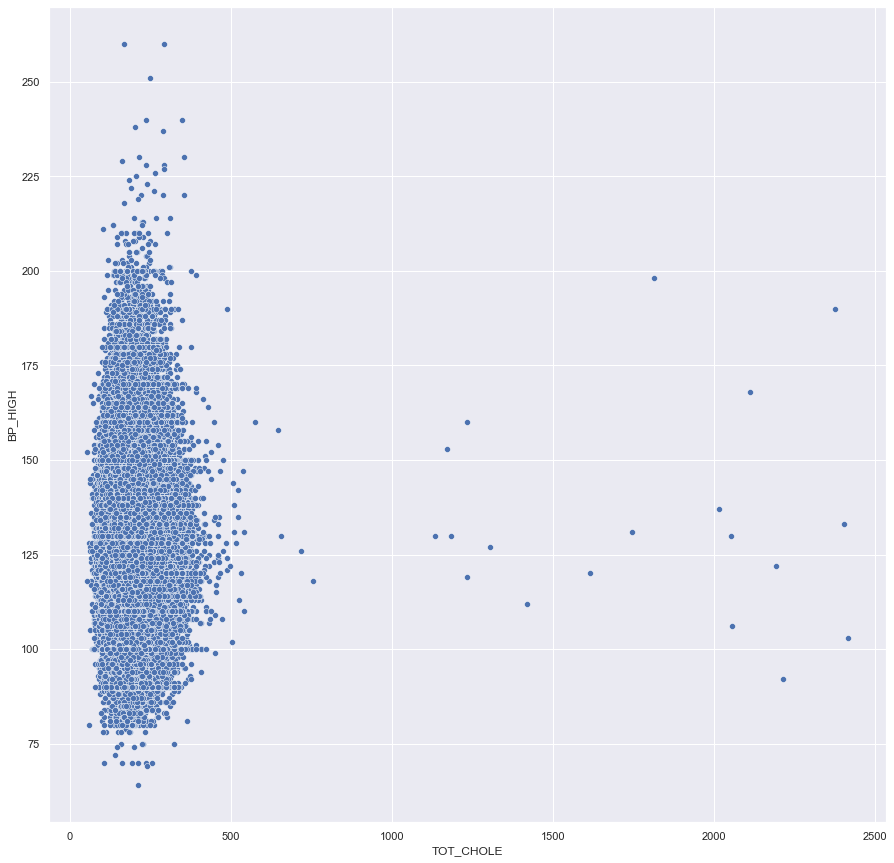

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(nh_eng['TOT_CHOLE'], nh_eng['BP_HIGH'])

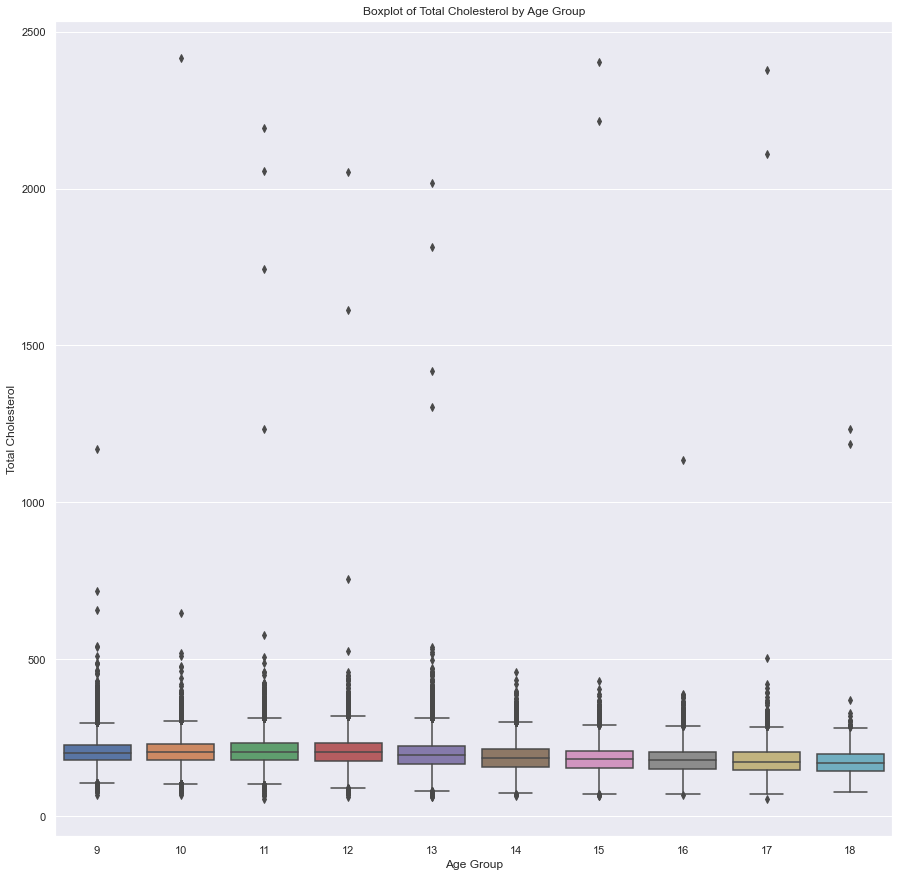

In [27]:
# 연령대별 총콜레스테롤 차이
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x=nh_eng['AGE_GROUP'], y=nh_eng['TOT_CHOLE'])
plt.xlabel('Age Group')  # x 축 레이블 설정
plt.ylabel('Total Cholesterol')  # y 축 레이블 설정
plt.title('Boxplot of Total Cholesterol by Age Group')  # 그래프 제목 설정
plt.show()  # 그래프 출력

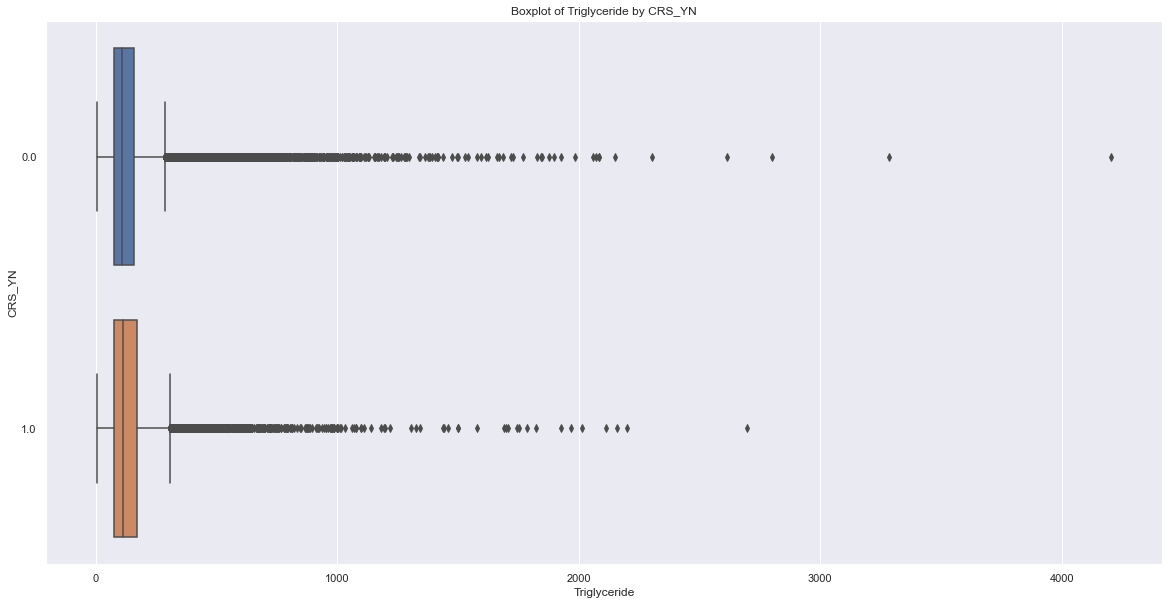

In [28]:
# 치아우식증 여부에 따른 트리글리세라이드 수치 비교
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=nh_eng['TRIGLYCERIDE'], y=nh_eng['CRS_YN'] ,orient='h')
plt.ylabel('CRS_YN')  
plt.xlabel('Triglyceride')  
plt.title('Boxplot of Triglyceride by CRS_YN') 
plt.show()

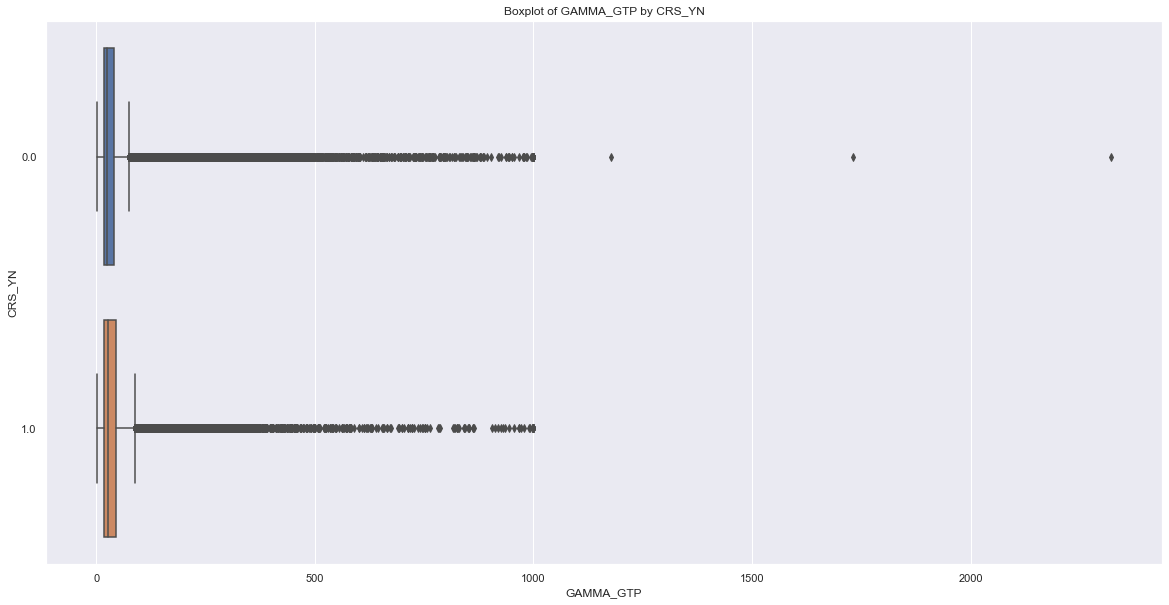

In [29]:
# 치아우식증 여부에 따른 감마지티피 비교
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=nh_eng['GAMMA_GTP'], y=nh_eng['CRS_YN'], orient='h')
plt.ylabel('CRS_YN')  # x 축 레이블 설정
plt.xlabel('GAMMA_GTP')  # y 축 레이블 설정
plt.title('Boxplot of GAMMA_GTP by CRS_YN')  # 그래프 제목 설정
plt.show()

In [30]:
# 치아우식증 여부에 따른 평균 건강상태의 차이
nh_eng.dropna(subset=['CRS_YN']).groupby('CRS_YN').mean().transpose()

CRS_YN,0.0,1.0
HCHK_YEAR,2020.000000,2020.000000
IDV_ID,500525.257485,499281.735376
SIDO,33.527242,34.548990
SEX,1.450139,1.394466
AGE_GROUP,11.624928,11.256820
HEIGHT,161.891603,162.760704
WEIGHT,63.910440,65.179888
WAIST,82.587297,83.180095
SIGHT_LEFT,0.936582,0.950808
SIGHT_RIGHT,0.933869,0.952408


## t-test 

In [31]:
nh_crs=nh_eng.dropna(subset=['CRS_YN'])
nh_crs

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
7,2020,8,41,1,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,3.0,0.0,1,0.0,2.0,2021-12-29
12,2020,13,41,1,14,175,80,90.0,0.8,0.7,...,0.8,21.0,21.0,41.0,3.0,1.0,1,0.0,0.0,2021-12-29
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,1.0,1.0,1,0.0,1.0,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,2020,999982,26,1,12,165,90,108.2,0.6,0.8,...,1.0,25.0,19.0,48.0,2.0,1.0,1,1.0,2.0,2021-12-29
999982,2020,999983,27,2,9,160,50,67.9,1.5,1.2,...,0.6,17.0,9.0,8.0,1.0,1.0,1,1.0,1.0,2021-12-29
999988,2020,999989,26,1,16,165,60,81.0,0.8,0.8,...,1.0,21.0,16.0,13.0,2.0,1.0,1,0.0,1.0,2021-12-29
999990,2020,999991,11,2,13,155,50,73.0,0.3,0.4,...,0.6,21.0,17.0,16.0,1.0,0.0,1,0.0,1.0,2021-12-29


In [32]:
from scipy import stats
col=nh_crs.iloc[:,3:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0'] = nh_crs[nh_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1'] = nh_crs[nh_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        t, p = stats.ttest_ind(globals()[f'col_{i}_0'], globals()[f'col_{i}_1'], equal_var=False)
        print(f'{i}의 t-statistic: ', t)
        print(f'{i}의 p-value: ', p)
        if p < 0.01:  # 유의수준 0.01로 설정
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하다.')
        else:
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하지 않다.')
        print('----------------------------------------')  

SEX의 t-statistic:  24.475797593147746
SEX의 p-value:  8.072852538587003e-132
치아우식증 여부에 따라 SEX의 평균의 차이는 유의하다.
----------------------------------------
AGE_GROUP의 t-statistic:  39.5856826836128
AGE_GROUP의 p-value:  0.0
치아우식증 여부에 따라 AGE_GROUP의 평균의 차이는 유의하다.
----------------------------------------
HEIGHT의 t-statistic:  -20.35738682199124
HEIGHT의 p-value:  6.859641064263599e-92
치아우식증 여부에 따라 HEIGHT의 평균의 차이는 유의하다.
----------------------------------------
WEIGHT의 t-statistic:  -21.555295129491686
WEIGHT의 p-value:  9.440129418765651e-103
치아우식증 여부에 따라 WEIGHT의 평균의 차이는 유의하다.
----------------------------------------
WAIST의 t-statistic:  -13.277753568791152
WAIST의 p-value:  3.442867098717179e-40
치아우식증 여부에 따라 WAIST의 평균의 차이는 유의하다.
----------------------------------------
SIGHT_LEFT의 t-statistic:  -5.422332761007367
SIGHT_LEFT의 p-value:  5.9003457335619526e-08
치아우식증 여부에 따라 SIGHT_LEFT의 평균의 차이는 유의하다.
----------------------------------------
SIGHT_RIGHT의 t-statistic:  -7.127365802556891
SIGHT_RIGHT의 p-val

- 거의 모든 변수가 유의함
- 성별에 따라 신장, 체중, 허리둘레, 헤모글로빈, 감마지티피 이런 변수들이 차이가 있음.
- 성별에 따라 치아우식증 여부에 차이가 있다보니 이로인해 신장, 무게, 허리둘레 이런 부분에서 차이가 있는 것이 아닐까(다중공선성 문제)
- 위의 문제를 해결해야함
- 전체적으로 각 컬럼들에 극단적인 이상치들이 있다보니 이를 적절히 처리하고 다시 한번 확인하자

### 07. 다변량 분석 Multivariate Analysis
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

nh_eng_1 = nh_eng.copy()
nh_eng_1.fillna(nh_eng_1.median(), inplace=True)

# VIF 계산 함수
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# 독립변수(X)와 종속변수(y) 분리
X = nh_eng_1.iloc[:,3:-6] # 종속변수가 있는 열을 제외한 독립변수들
y = nh_eng_1['CRS_YN'] # 종속변수

# VIF 계산
vif_result = calculate_vif(X)

# VIF 결과 출력
print(vif_result)

         Features         VIF
0             SEX   15.085500
1       AGE_GROUP   49.571294
2          HEIGHT  277.097379
3          WEIGHT  132.947527
4           WAIST  253.658379
5      SIGHT_LEFT    3.467808
6     SIGHT_RIGHT    3.417839
7       HEAR_LEFT   34.667718
8      HEAR_RIGHT   36.095923
9         BP_HIGH  166.661299
10        BP_LWST  133.411276
11           BLDS   19.770298
12      TOT_CHOLE  738.694299
13   TRIGLYCERIDE   10.260527
14      HDL_CHOLE   60.879437
15      LDL_CHOLE  279.424438
16            HMG  139.609340
17  OLIG_PROTE_CD    6.441755
18     CREATININE    7.234160
19       SGOT_AST    5.161217
20       SGOT_ALT    5.248711
21      GAMMA_GTP    1.933932


- VIF(Variance Inflation Factor)는 회귀 분석에서 예측 변수들 간의 상관관계의 정도를 나타내는 다중공선성의 측정치이다.
- VIF 값이 10보다 크면 다중공선성의 존재를 나타낼 수 있습니다.

- 나이_그룹 (VIF = 49.571294)
- 키 (VIF = 277.097379)
- 몸무게 (VIF = 132.947527)
- 허리둘레 (VIF = 253.658379)
- 최고혈압 (VIF = 166.661299)
- 최저혈압 (VIF = 133.411276)
- 총콜레스테롤 (VIF = 738.694299)
- LDL콜레스테롤 (VIF = 279.424438)
- 혈색소 (VIF = 139.60934)

- 이러한 변수들은 다중공선성이 높을 가능성이 있다.

## 로지스틱 회귀분석
- 로지스틱 회귀(Logistic Regression)는 이진변수에 대해 다중공선성에 민감하지 않은 모델
- 위의 다중공선성이 높은 변수들이 존재하다보니 로지스틱 회귀분석 선택

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
nh_crs_drop=nh_crs.dropna()

### 치아우식증 여부를 알아내기 위한.
- 치아 검진 데이터가 포함

In [36]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_crs_drop.iloc[:,3:-1].drop('CRS_YN', axis=1)  # 독립변수
y = nh_crs_drop['CRS_YN']  # 종속변수

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.8304126174924327
오차 행렬:
 [[20846    12]
 [ 4246     4]]


In [37]:
# 회귀계수 확인
coef = model.coef_
intercept = model.intercept_

print("회귀계수 (Coefficients):")
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[0][i]}")
print(f"Intercept: {intercept[0]}")


# 상위 10개 독립변수 출력
top_10_idx = abs(coef).argsort(axis=1)[:, :-11:-1]
top_10_features = X.columns[top_10_idx]
print("상위 10개 독립변수:\n", top_10_features)

회귀계수 (Coefficients):
SEX: -0.014684099293902079
AGE_GROUP: -0.09227176063120147
HEIGHT: -0.0039034964594838657
WEIGHT: -0.0044824180257063044
WAIST: 0.006912907203851309
SIGHT_LEFT: 0.0010818162532070898
SIGHT_RIGHT: 0.00035444801226527397
HEAR_LEFT: -3.9883305053214566e-05
HEAR_RIGHT: 0.00011766062604196322
BP_HIGH: 0.004447370146607195
BP_LWST: -0.0013839754500164178
BLDS: 0.0017881473989043977
TOT_CHOLE: 0.013089998075935338
TRIGLYCERIDE: -0.002787506309822095
HDL_CHOLE: -0.01665745329523494
LDL_CHOLE: -0.013000958136695329
HMG: 0.001820942026266319
OLIG_PROTE_CD: 0.0010837954482207975
CREATININE: -0.0014421912403188367
SGOT_AST: 0.0036528964379872785
SGOT_ALT: -0.0033591926375390177
GAMMA_GTP: 0.0005628546003383483
SMK_STAT_TYPE_CD: 0.04634717484788181
DRK_YN: 0.003775347863889615
HCHK_OE_INSPEC_YN: -0.0008680742826166926
TTR_YN: 0.11318425816186904
Intercept: -0.0008680804788551227
상위 10개 독립변수:
 [['TTR_YN' 'AGE_GROUP' 'SMK_STAT_TYPE_CD' 'HDL_CHOLE' 'SEX' 'TOT_CHOLE'
  'LDL_CHOLE' 

In [38]:
# 회귀식 구성
equation = "logit(p) = "
for i in range(len(X.columns)):
    equation += f"({coef[0][i]} * {X.columns[i]}) + "
equation += f"{intercept[0]}"
print("로지스틱 회귀식:\n", equation)

로지스틱 회귀식:
 logit(p) = (-0.014684099293902079 * SEX) + (-0.09227176063120147 * AGE_GROUP) + (-0.0039034964594838657 * HEIGHT) + (-0.0044824180257063044 * WEIGHT) + (0.006912907203851309 * WAIST) + (0.0010818162532070898 * SIGHT_LEFT) + (0.00035444801226527397 * SIGHT_RIGHT) + (-3.9883305053214566e-05 * HEAR_LEFT) + (0.00011766062604196322 * HEAR_RIGHT) + (0.004447370146607195 * BP_HIGH) + (-0.0013839754500164178 * BP_LWST) + (0.0017881473989043977 * BLDS) + (0.013089998075935338 * TOT_CHOLE) + (-0.002787506309822095 * TRIGLYCERIDE) + (-0.01665745329523494 * HDL_CHOLE) + (-0.013000958136695329 * LDL_CHOLE) + (0.001820942026266319 * HMG) + (0.0010837954482207975 * OLIG_PROTE_CD) + (-0.0014421912403188367 * CREATININE) + (0.0036528964379872785 * SGOT_AST) + (-0.0033591926375390177 * SGOT_ALT) + (0.0005628546003383483 * GAMMA_GTP) + (0.04634717484788181 * SMK_STAT_TYPE_CD) + (0.003775347863889615 * DRK_YN) + (-0.0008680742826166926 * HCHK_OE_INSPEC_YN) + (0.11318425816186904 * TTR_YN) + -0.

In [39]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):
TTR_YN: 0.11318425816186904
AGE_GROUP: -0.09227176063120147
SMK_STAT_TYPE_CD: 0.04634717484788181
HDL_CHOLE: -0.01665745329523494
SEX: -0.014684099293902079
TOT_CHOLE: 0.013089998075935338
LDL_CHOLE: -0.013000958136695329
WAIST: 0.006912907203851309
WEIGHT: -0.0044824180257063044
BP_HIGH: 0.004447370146607195
HEIGHT: -0.0039034964594838657
DRK_YN: 0.003775347863889615
SGOT_AST: 0.0036528964379872785
SGOT_ALT: -0.0033591926375390177
TRIGLYCERIDE: -0.002787506309822095
HMG: 0.001820942026266319
BLDS: 0.0017881473989043977
CREATININE: -0.0014421912403188367
BP_LWST: -0.0013839754500164178
OLIG_PROTE_CD: 0.0010837954482207975
SIGHT_LEFT: 0.0010818162532070898
HCHK_OE_INSPEC_YN: -0.0008680742826166926
GAMMA_GTP: 0.0005628546003383483
SIGHT_RIGHT: 0.00035444801226527397
HEAR_RIGHT: 0.00011766062604196322
HEAR_LEFT: -3.9883305053214566e-05


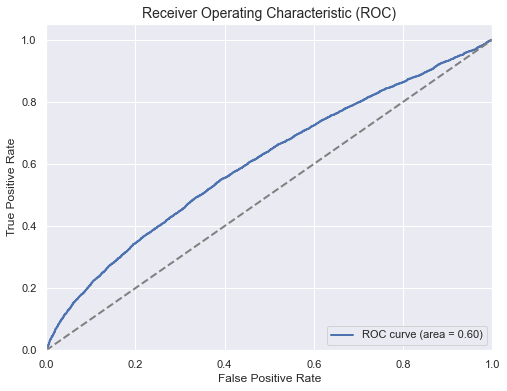

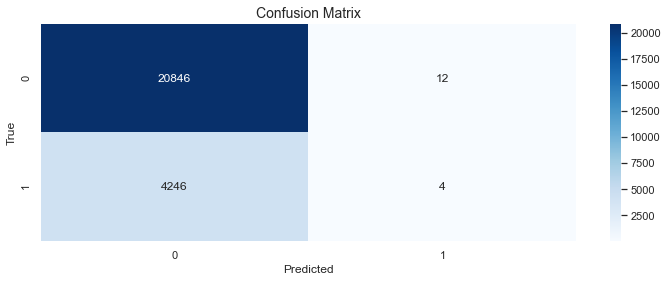

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ROC 곡선 그리기
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix 그리기
confusion_mat = confusion_matrix(y_test, y_pred)
labels = ['0', '1']
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### 치아우식증 여부를 알아내기 위한.
- 치아 검진 데이터 불포함

In [41]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_crs_drop.iloc[:,3:-4]  # 독립변수, 치아검진 데이터 불포함
y = nh_crs_drop['CRS_YN']  # 종속변수

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.8305321013222877
오차 행렬:
 [[20853     5]
 [ 4250     0]]


In [42]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):
AGE_GROUP: -0.0672331943359713
SMK_STAT_TYPE_CD: 0.032689086706566006
HDL_CHOLE: -0.01175327950164798
SEX: -0.010425876399879259
LDL_CHOLE: -0.009089269140509247
TOT_CHOLE: 0.009074503662628108
HEIGHT: -0.0031913750185991615
BP_HIGH: 0.0028779099960581657
DRK_YN: 0.002842047077446735
SGOT_AST: 0.002152121054235864
TRIGLYCERIDE: -0.0018643200377100693
SGOT_ALT: -0.001762984382466815
WAIST: 0.0016933353467563092
HMG: 0.0013039295385807084
CREATININE: -0.0010157635670293974
BP_LWST: -0.0009529675352854096
BLDS: 0.0009290630015264239
SIGHT_LEFT: 0.0008282594285827079
OLIG_PROTE_CD: 0.0007385701769552209
WEIGHT: 0.000666053790322875
GAMMA_GTP: 0.0005128883230079992
SIGHT_RIGHT: 0.0003186403089846682
HEAR_LEFT: -0.0001440330764537531
HEAR_RIGHT: -3.095178889948497e-05


- 치아우식증 여부를 알아내기 위한 로지스틱 회귀분석을 실시하였다.
- 치아 검진 데이터가 포함된 경우와 그렇지 않은 경우 두가지로 나누어 실시했을때
- 두 분석의 정확도에는 큰 차이가 없다.
- 0.8304126174924327와 0.8305321013222877 오히려 미세하게 치아검진 데이터가 불포함했을때 정확도가 높다.
- 치아검진을 포함했을 때 상위 10개 독립변수:
-  [['TTR_YN' 'AGE_GROUP' 'SMK_STAT_TYPE_CD' 'HDL_CHOLE' 'SEX' 'TOT_CHOLE'
  'LDL_CHOLE' 'WAIST' 'WEIGHT' 'BP_HIGH']]
- 치아검진을 불포함했을 때 상위 10개 독립변수:
- [['AGE_GROUP' 'SMK_STAT_TYPE_CD' 'HDL_CHOLE' 'SEX' 'LDL_CHOLE'
  'TOT_CHOLE' 'HEIGHT' 'BP_HIGH' 'DRK_YN' 'SGOT_AST']]

## 주성분 분석

In [43]:
from sklearn.decomposition import PCA

# 데이터 준비
X = nh_crs_drop.iloc[:, 3:-4]  # 독립변수, 치아검진 데이터 불포함

# PCA 수행
pca = PCA(n_components=10)  # 원하는 주성분 개수 설정
X_pca = pca.fit_transform(X)

# 주성분의 설명된 분산 비율 확인
explained_var_ratio = pca.explained_variance_ratio_
print("주성분의 설명된 분산 비율:", explained_var_ratio)

# 주성분의 회귀계수 확인 (주성분이 어떤 독립변수들의 조합으로 이루어졌는지 확인 가능)
pc_loadings = pca.components_
print("주성분의 회귀계수:\n", pc_loadings)

# 주성분별로 어떤 변수가 큰 영향을 주는지 확인 (절대값이 큰 순서대로 상위 10개 변수 출력)
for i, pc_loading in enumerate(pc_loadings):
    sorted_idx = abs(pc_loading).argsort()[::-1][:10]
    print(f"주성분 {i+1}의 상위 10개 변수: {X.columns[sorted_idx]}")

주성분의 설명된 분산 비율: [0.43629947 0.24184747 0.16115395 0.04518018 0.04023863 0.02504542
 0.02036432 0.01359745 0.0065335  0.00462057]
주성분의 회귀계수:
 [[-1.81596853e-03 -1.63884232e-03  2.51620832e-02  6.15734633e-02
   4.84664308e-02  1.87226907e-04  2.04807826e-04 -4.68043232e-05
  -3.75157712e-05  3.79664561e-02  3.07289691e-02  6.88425062e-02
   1.57281208e-01  9.34582522e-01 -7.68488612e-02  5.21231402e-02
   6.67115225e-03  3.46907754e-04  4.80155048e-04  4.46249483e-02
   9.08585131e-02  2.62662831e-01  2.68793118e-03  7.55596459e-04]
 [ 1.44340134e-03 -5.42669009e-03 -1.30536905e-02 -2.41375092e-02
  -2.44246726e-02  1.34938563e-04  1.16951430e-04 -2.60396963e-04
  -2.38972270e-04 -1.86956946e-02  4.79983661e-04 -8.05004833e-02
   7.12963659e-01 -1.03812027e-01  6.51361158e-02  6.72333263e-01
   3.83001454e-04 -4.42722783e-04 -3.42830386e-04 -2.79224738e-02
  -3.28239780e-02 -1.20664870e-01 -1.49805157e-03  2.11254323e-05]
 [-1.63406703e-03 -2.23268769e-03  2.12813865e-02  2.86694717e-02

- 종속변수가 이진변수 일때 PCA가 적합한가?

In [44]:
# 연령대 별 건강상태 차이
nh_eng.dropna(subset=['AGE_GROUP']).groupby('AGE_GROUP').mean().transpose()

AGE_GROUP,9,10,11,12,13,14,15,16,17,18
HCHK_YEAR,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
IDV_ID,499718.979652,498804.955905,500233.247039,499817.242468,500883.408876,500520.840906,501456.518083,499641.092900,497104.209222,498893.272407
SIDO,34.077555,34.312891,34.166603,34.218961,33.732417,33.407614,33.567680,34.107138,35.398957,36.909732
SEX,1.434114,1.450123,1.492394,1.496471,1.519272,1.510265,1.519087,1.535308,1.554164,1.626423
HEIGHT,165.665453,164.119689,162.111551,160.653006,159.128217,157.810347,156.577041,154.966042,153.267382,150.440115
WEIGHT,67.240221,65.677141,63.903674,62.595556,61.504197,60.789298,59.730784,58.025530,55.841417,51.026134
WAIST,81.683779,81.405677,81.477849,81.969639,82.676796,83.763746,84.365494,84.680074,84.442829,82.103564
SIGHT_LEFT,1.074190,1.013562,0.974431,0.940721,0.876169,0.817555,0.784676,0.764188,0.725754,0.737647
SIGHT_RIGHT,1.070411,1.011263,0.976357,0.943622,0.880179,0.824614,0.792073,0.757936,0.749793,0.745669
HEAR_LEFT,1.007226,1.011309,1.017728,1.029698,1.046908,1.072058,1.117630,1.175946,1.238211,1.324615


- 40 ~ 44세가 음주를 가장 많이함, 
- 그에 따라 알코올에 의한 간장애의 지표가 되는 검사인 감마지티피도 두번째로 높음.
- 치석 여부도 가장 높음. 치아 우식증 여부도 가장높음
- 흡연 여부도 가장 높음.
- 위의 로지스틱 회귀분석을 통해 치아우식증에 가장 높은 독립변수가 연령대와 흡연 여부 였는데
- 40 ~ 44세가 흡연 비율이 높다 보니 치석 여부와 치아 우식증 여부가 높은게 아닐까라는  

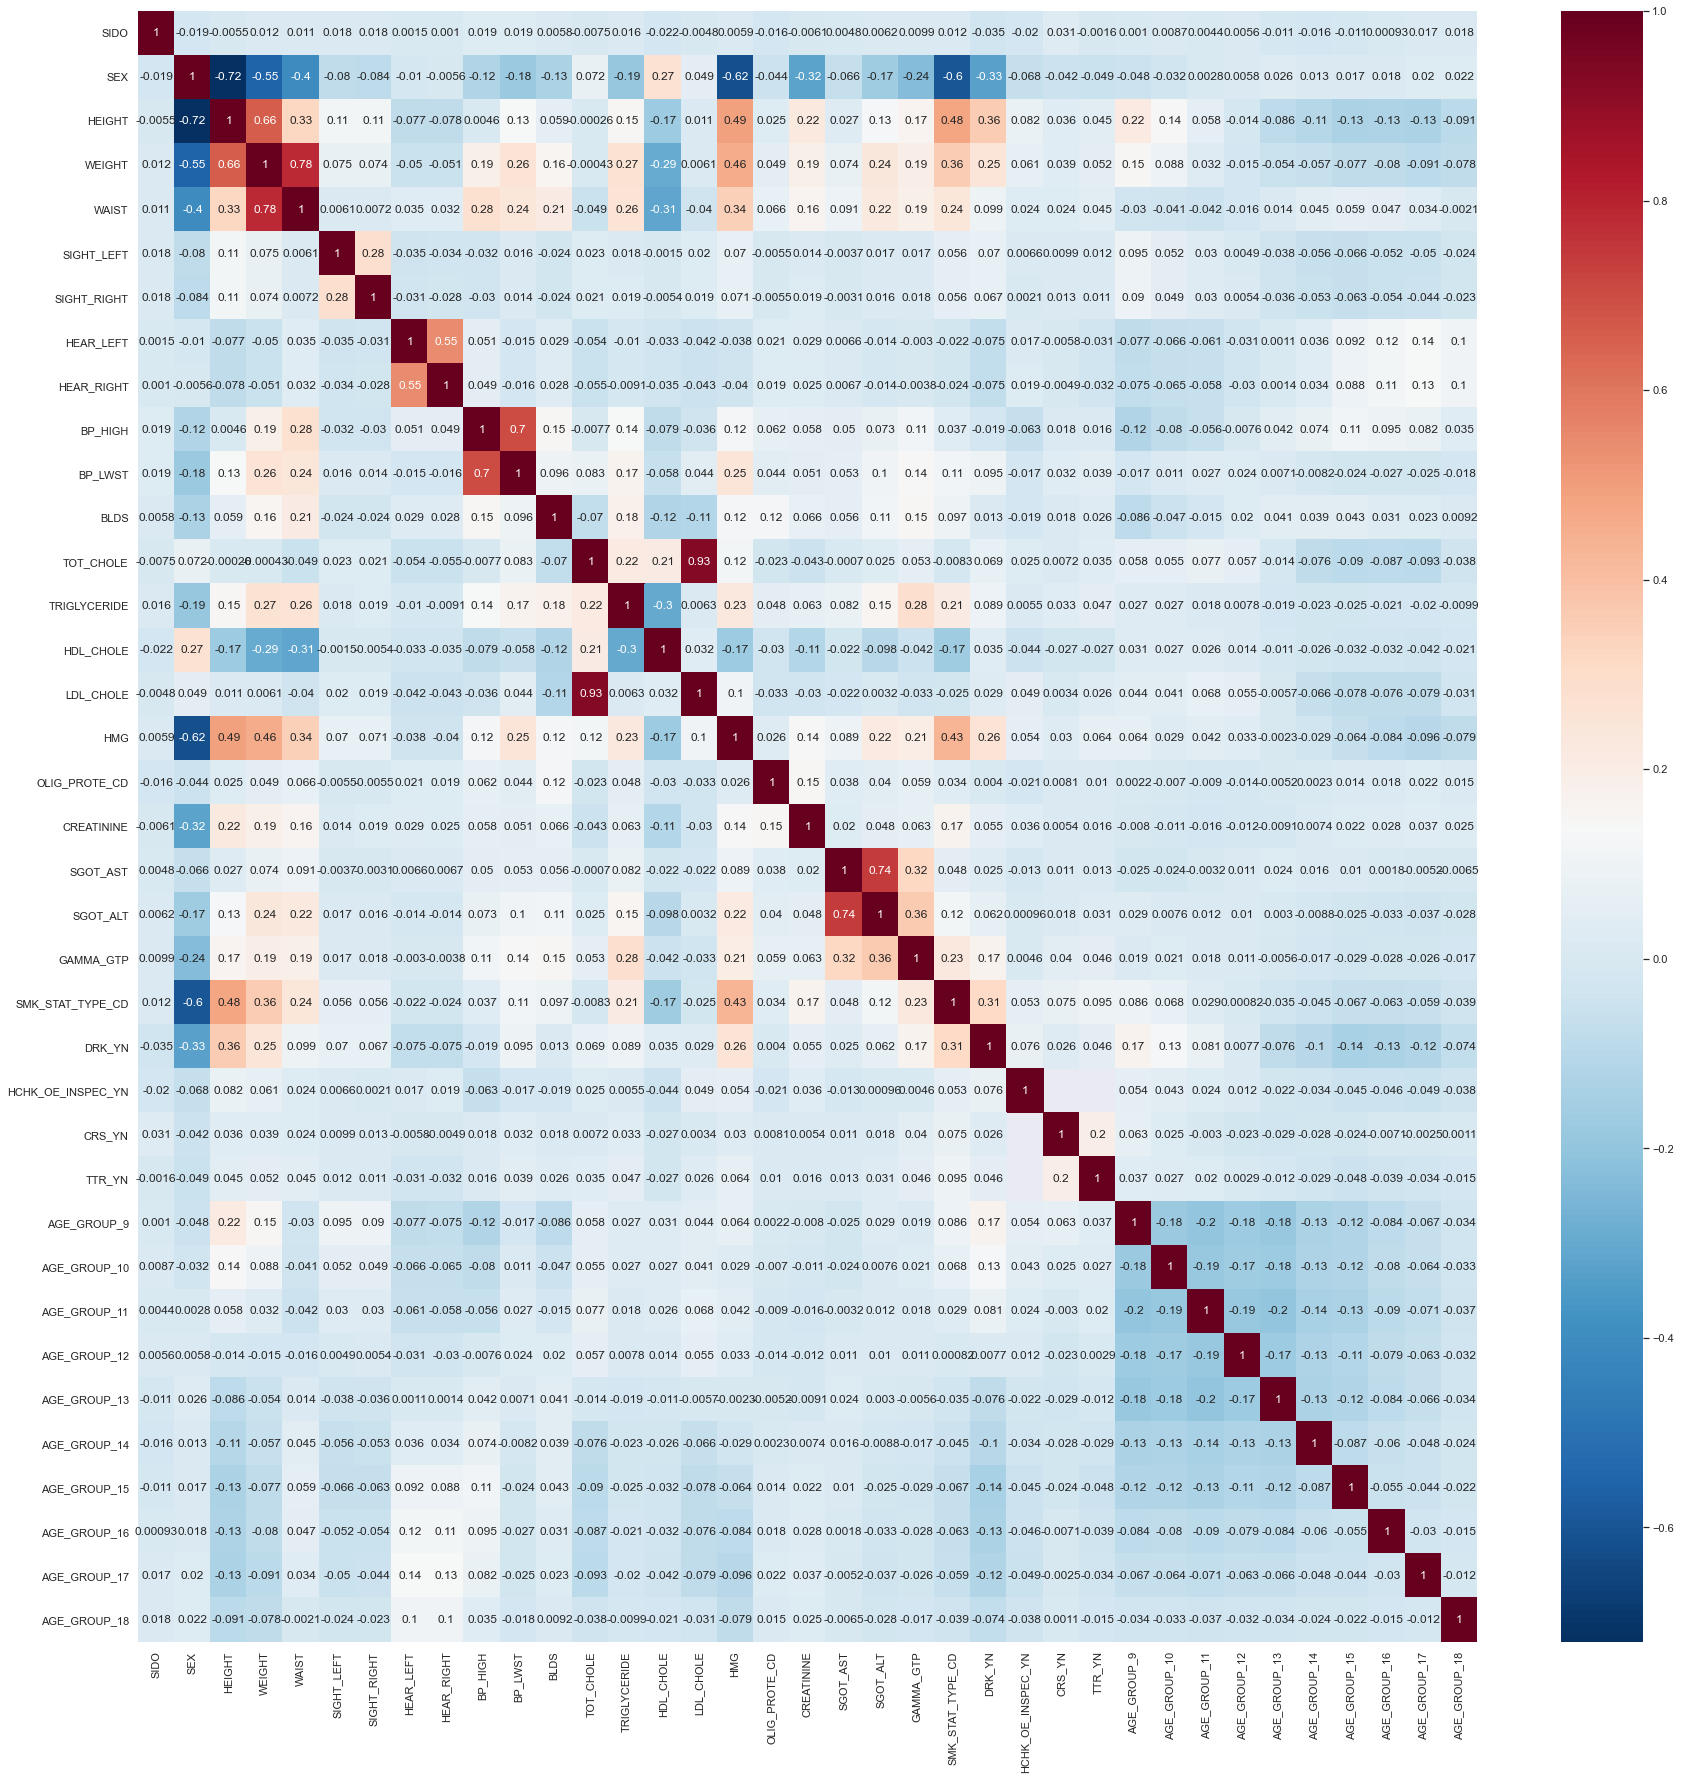

In [45]:
# 연령대를 더미변수화 함
# 연령대별 건강 통계분석 - 상관관계
nh_dummy = pd.get_dummies(nh_eng.iloc[:,2:-1], columns=['AGE_GROUP'], prefix='AGE_GROUP')
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(nh_dummy.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [46]:
# 연령대 더미변수한 데이터 상관관계 계산
corr_dummy = nh_dummy.corr()
corr_9 = corr_dummy['AGE_GROUP_9']
corr_9 = corr_9.drop('AGE_GROUP_9')  # 같은 연령대 상관관계는 제외
corr_9 = corr_9.abs().sort_values(ascending=False)  # 절댓값으로 정렬

# # 상관관계가 높은 순서대로 상위 10개 변수 출력
top_20_corr_9 = corr_9.head(20)
print("40~44세에서 상관관계가 높은 상위 20개 변수:\n", top_20_corr_9)

40~44세에서 상관관계가 높은 상위 20개 변수:
 HEIGHT              0.219980
AGE_GROUP_11        0.198700
AGE_GROUP_13        0.184393
AGE_GROUP_10        0.176637
AGE_GROUP_12        0.175149
DRK_YN              0.170912
WEIGHT              0.146597
AGE_GROUP_14        0.132563
AGE_GROUP_15        0.121409
BP_HIGH             0.119970
SIGHT_LEFT          0.095291
SIGHT_RIGHT         0.090338
SMK_STAT_TYPE_CD    0.086184
BLDS                0.085930
AGE_GROUP_16        0.083960
HEAR_LEFT           0.077152
HEAR_RIGHT          0.075172
AGE_GROUP_17        0.066620
HMG                 0.063521
CRS_YN              0.063443
Name: AGE_GROUP_9, dtype: float64


In [47]:
# 치아우식증 유무별 건강 통계분석 - 상관관계
# 상관관계 계산
correlation = nh_eng.corr()

# 치아우식증과 다른 변수들의 상관관계 확인
correlation_with_chia = correlation['CRS_YN']
correlation_with_chia = correlation_with_chia.drop('CRS_YN')  # 자기 자신과의 상관관계는 제외
correlation_with_chia = correlation_with_chia.abs().sort_values(ascending=False)  # 절댓값으로 정렬

# 상관관계가 높은 순서대로 상위 5개 변수 출력
top_5_correlated = correlation_with_chia.head(5)
print("치아우식증과 상관관계가 높은 상위 5개 변수:\n", top_5_correlated)

치아우식증과 상관관계가 높은 상위 5개 변수:
 TTR_YN              0.196068
SMK_STAT_TYPE_CD    0.074606
AGE_GROUP           0.068458
SEX                 0.041983
GAMMA_GTP           0.039929
Name: CRS_YN, dtype: float64


#### 치아우식증 여부와 상관관계가 높은 변수들 순서대로 5개
- 치석여부
- 흡연 여부
- 연령대
- 성별
- 감마GPT

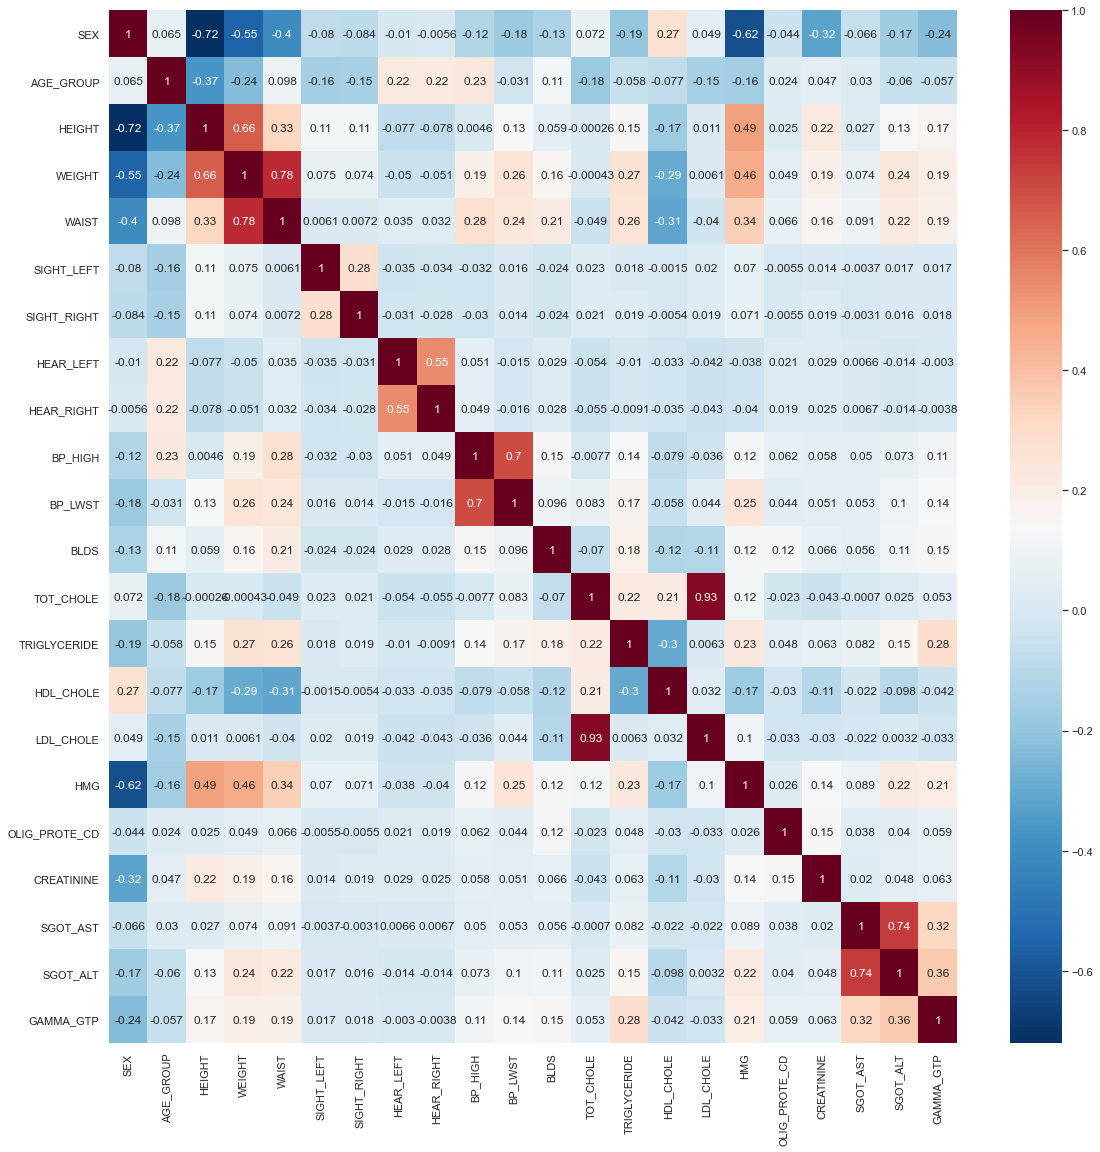

In [48]:
# 히트맵
nh_corr=nh_eng.iloc[:,3:-6].corr(method='pearson')
fig, ax = plt.subplots(figsize=(19, 19))
sns.heatmap(nh_corr, xticklabels=nh_corr.columns, yticklabels=nh_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

- 성별과 신장, 체중, 허리둘레, 헤모글로빈에 상관관계가 있는 편
- 체중과 신장 간에 상관관계 0.6619 
- 체중과 허리둘레 간에 상관관계 0.7840
- 수축기 혈압과 이완기 혈압 간에 상관관계 0.7001
- 총 콜레스테롤과 LDL콜레스테롤 간에 상관관계 0.9268
- (혈청지오티)AST과 (혈청지오티)ALT간에 상관관계 0.7419

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

### 09. 데이터 변환 Data Transformation
- 스케일링, 인코딩, 결측치 처리 등을 적용하여 데이터를 변환합니다.
- 각 데이터의 특성에 따라 처리방법에 대하여 적합한 방법을 선택합니다.
- 스케일링 방법 
>- Min-Max Scaling : 데이터를 최소값과 최대값을 이용하여 0과 1 사이의 범위로 조정하는 방법입니다.
>- Standard Scaling : 데이터의 평균값과 표준편차를 이용하여 표준정규분포 형태로 조정하는 방법입니다.
>- MaxAbs Scaling : 데이터의 최대절대값을 이용하여 -1과 1 사이의 범위로 조정하는 방법입니다.
>- Robust Scaling : Median과 Interquartile range(IQR)를 이용하여 이상치(outlier)에 영향을 받지 않고 Scaling하는 방법입니다.
>- Power Transform : 데이터의 분포가 비대칭(skewed)한 경우, 분포를 정규분포와 같은 형태로 조정하는 방법입니다.
- 인코딩 방법(범주형 변수)
>- One-hot Encoding : 범주형 변수를 이진형 변수로 변환하는 방법입니다. 2개 이상인 경우에는 사용하는 것이 좋습니다.
>- Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여하는 방법입니다. 정수값이 모델에 영향을 미칠 수 있지만 변수의 값이 매우 많은 경우에는 고려해볼 수도 있습니다.
- 결측치 처리 방법
>- 결측치가 있는 데이터 행 삭제 : 결측치가 있는 데이터 행을 삭제하는 방법입니다. 하지만 이 경우 데이터의 양이 많지 않을 때는 유용할 수 있지만, 결측치가 많은 경우 데이터의 손실이 크게 일어날 수 있습니다.
>- 평균값으로 대체: 결측치가 있는 특성의 평균값으로 결측치를 대체하는 방법입니다. 이 방법은 결측치가 일부인 경우 유용할 수 있습니다.
>- 중앙값으로 대체: 결측치가 있는 특성의 중앙값으로 결측치를 대체하는 방법입니다. 이 방법은 이상치가 있을 때 유용할 수 있습니다.
>- 최빈값으로 대체: 결측치가 있는 특성의 최빈값으로 결측치를 대체하는 방법입니다. 이 방법은 범주형 데이터에서 유용합니다.
>- 다른 특성의 값으로 대체: 다른 특성의 값에 따라 결측치를 대체하는 방법입니다. 예를 들어, 같은 그룹에 속한 데이터들의 평균값으로 결측치를 대체하는 것입니다.
>- 모델링을 통한 대체: 다른 특성을 이용하여 결측치를 예측하는 모델을 구축하여 결측치를 대체하는 방법입니다. 이 방법은 데이터 양이 많은 경우에 유용합니다.

In [49]:
nh_x = nh_eng.copy()

In [50]:
# 시력에서 실명을 9.9로 표기 했는데 이를 0으로 치환
nh_x['SIGHT_LEFT'].replace(9.9, 0, inplace=True)
nh_x['SIGHT_RIGHT'].replace(9.9, 0, inplace=True)

print("처리 전 데이터 :\n",nh_eng['SIGHT_LEFT'].describe())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['SIGHT_LEFT'].describe())
print('--------------------------------------------------')
print("처리 전 데이터 :\n",nh_eng['SIGHT_RIGHT'].describe())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['SIGHT_RIGHT'].describe())

처리 전 데이터 :
 count    999743.000000
mean          0.933045
std           0.637453
min           0.100000
25%           0.700000
50%           0.900000
75%           1.200000
max           9.900000
Name: SIGHT_LEFT, dtype: float64
--------------------------------------------------
이상치 처리 후의 데이터 :
 count    999743.000000
mean          0.896178
std           0.329847
min           0.000000
25%           0.700000
50%           0.900000
75%           1.200000
max           2.500000
Name: SIGHT_LEFT, dtype: float64
--------------------------------------------------
처리 전 데이터 :
 count    999748.000000
mean          0.935036
std           0.644911
min           0.100000
25%           0.700000
50%           0.900000
75%           1.200000
max           9.900000
Name: SIGHT_RIGHT, dtype: float64
--------------------------------------------------
이상치 처리 후의 데이터 :
 count    999748.000000
mean          0.896802
std           0.327773
min           0.000000
25%           0.700000
50%           0.900000

In [51]:
# 청력에서 1(정상), 2(비정상)이다. 
# 하지만 데이터에 3이라는 수치가 있는데 이를 1(정상)으로 치환
nh_x['HEAR_LEFT'].replace(3, 1, inplace=True)
nh_x['HEAR_RIGHT'].replace(3, 1, inplace=True)

print("처리 전 데이터 :\n",nh_eng['HEAR_LEFT'].value_counts())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['HEAR_LEFT'].value_counts())
print('--------------------------------------------------')
print("처리 전 데이터 :\n",nh_eng['HEAR_RIGHT'].value_counts())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['HEAR_RIGHT'].value_counts())

처리 전 데이터 :
 1.0    955154
2.0     42924
3.0      1700
Name: HEAR_LEFT, dtype: int64
--------------------------------------------------
이상치 처리 후의 데이터 :
 1.0    956854
2.0     42924
Name: HEAR_LEFT, dtype: int64
--------------------------------------------------
처리 전 데이터 :
 1.0    957287
2.0     40905
3.0      1578
Name: HEAR_RIGHT, dtype: int64
--------------------------------------------------
이상치 처리 후의 데이터 :
 1.0    958865
2.0     40905
Name: HEAR_RIGHT, dtype: int64


In [52]:
col = nh_x.iloc[:, 12:-6].columns.to_list()
col.append('WAIST')
col.remove('OLIG_PROTE_CD')
col

['BP_HIGH',
 'BP_LWST',
 'BLDS',
 'TOT_CHOLE',
 'TRIGLYCERIDE',
 'HDL_CHOLE',
 'LDL_CHOLE',
 'HMG',
 'CREATININE',
 'SGOT_AST',
 'SGOT_ALT',
 'GAMMA_GTP',
 'WAIST']

In [53]:
for c in col:
    # Calculate IQR
    Q1 = nh_x[c].quantile(0.25)
    Q3 = nh_x[c].quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers and replace with median
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    nh_x[c] = np.where((nh_x[c] < lower_bound) | (nh_x[c] > upper_bound), nh_x[c].median(), nh_x[c])
    
    print(f'######{c}######')
    print("처리 전 데이터 :\n",nh_eng[c].describe())
    print('--------------------------------------------------')
    print("이상치 처리 후의 데이터 :\n",nh_x[c].describe())

######BP_HIGH######
처리 전 데이터 :
 count    992468.000000
mean        124.831874
std          14.751504
min          64.000000
25%         115.000000
50%         124.000000
75%         134.000000
max         260.000000
Name: BP_HIGH, dtype: float64
--------------------------------------------------
이상치 처리 후의 데이터 :
 count    992468.000000
mean        124.270477
std          13.660487
min          87.000000
25%         115.000000
50%         124.000000
75%         133.000000
max         162.000000
Name: BP_HIGH, dtype: float64
######BP_LWST######
처리 전 데이터 :
 count    992466.000000
mean         76.815972
std           9.990877
min          30.000000
25%          70.000000
50%          77.000000
75%          83.000000
max         190.000000
Name: BP_LWST, dtype: float64
--------------------------------------------------
이상치 처리 후의 데이터 :
 count    992466.000000
mean         76.541802
std           9.378509
min          51.000000
25%          70.000000
50%          77.000000
75%          82.0000

- 수치형 변수들의 이상치들을 중앙값으로 대체

In [54]:
# 치석
# 0(없음), 1(있음) 이라고 매뉴얼에는 표기되어있으나 매뉴얼에는 존재하지 않는 수치 2가 1.7% 존재함
# 2를 결측치 처리함.
nh_x['TTR_YN'].replace(2, np.nan, inplace=True)
print("이상치 처리 후의 결측치 :",nh_x['TTR_YN'].isnull().sum())
print("원데이터의 결측치 :",nh_eng['TTR_YN'].isnull().sum())

이상치 처리 후의 결측치 : 686027
원데이터의 결측치 : 668618


<AxesSubplot:>

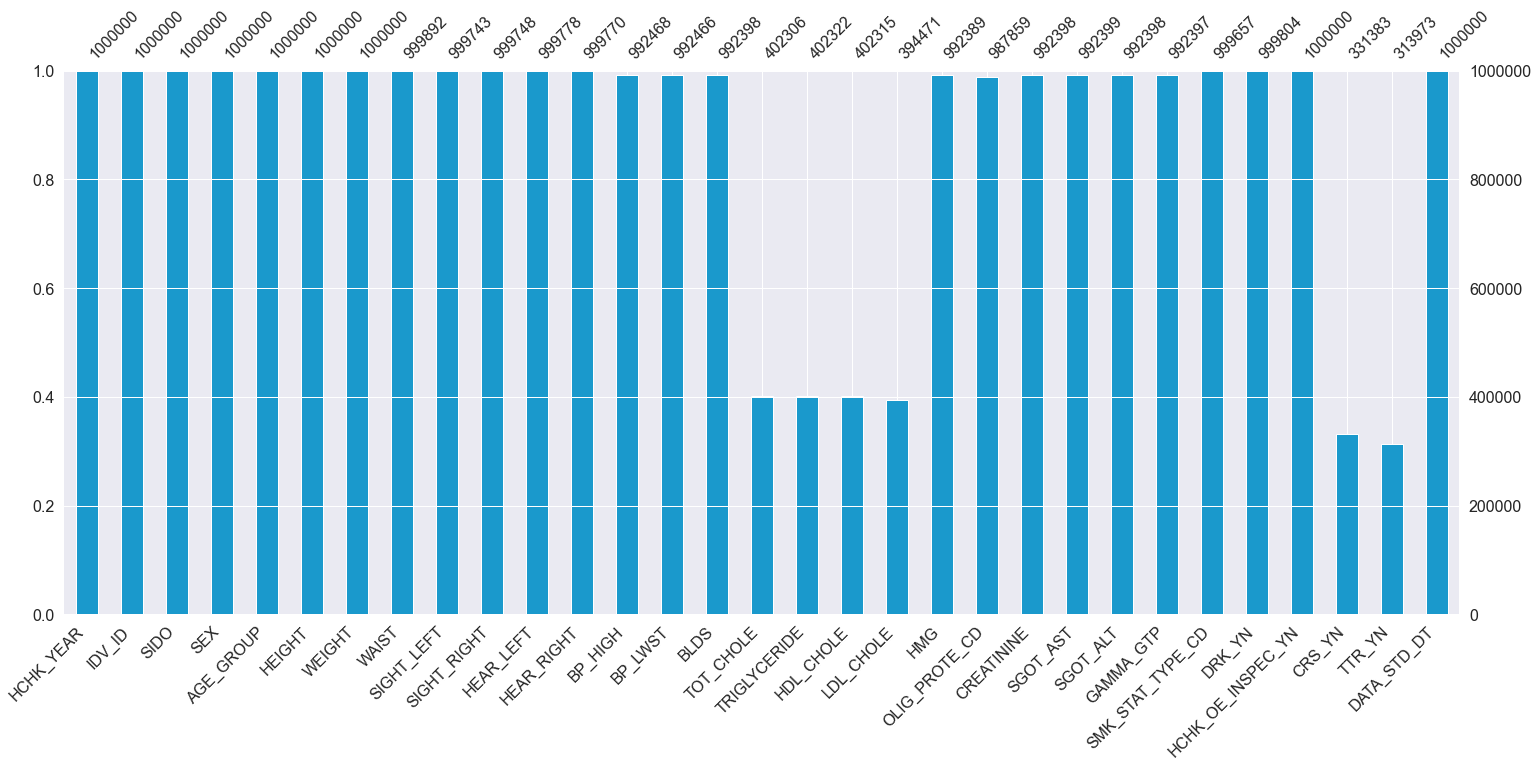

In [55]:
msno.bar(df=nh_x,  color=(0.1, 0.6, 0.8))

<AxesSubplot:xlabel='TOT_CHOLE', ylabel='BP_HIGH'>

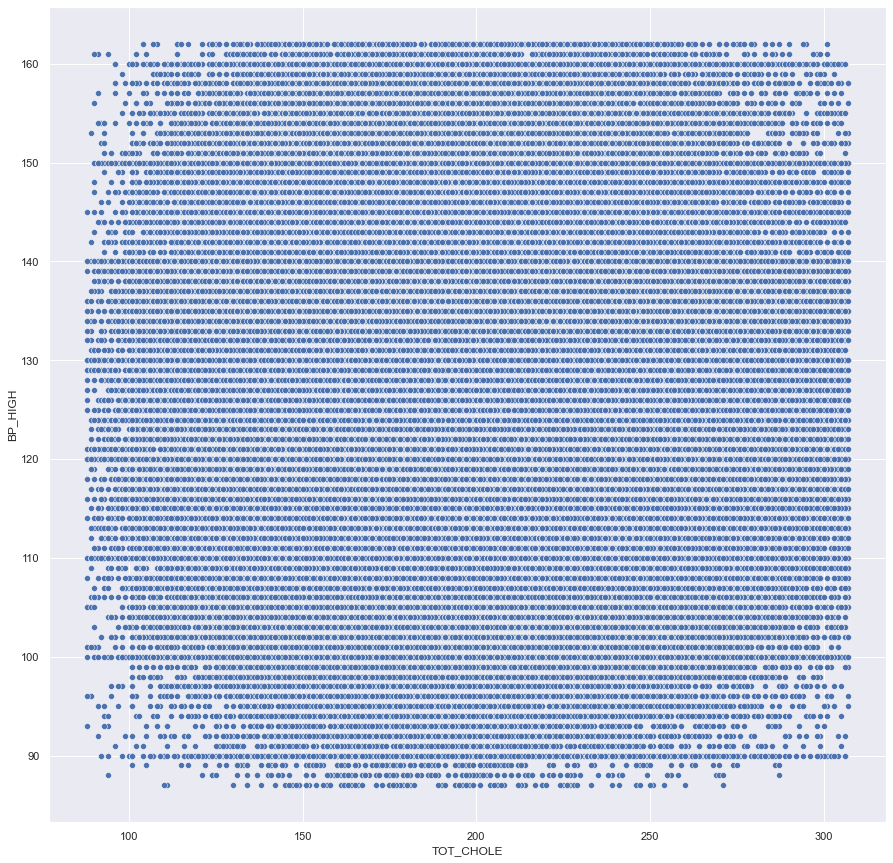

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(nh_x['TOT_CHOLE'], nh_x['BP_HIGH'])

<AxesSubplot:xlabel='TOT_CHOLE'>

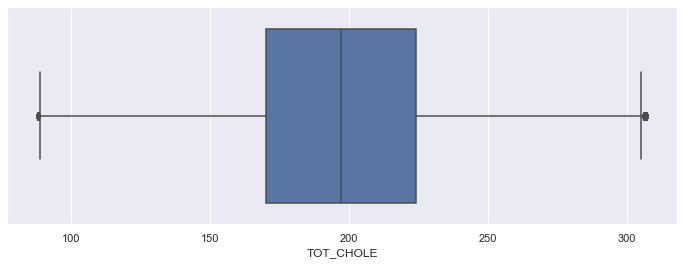

In [57]:
sns.boxplot(nh_x['TOT_CHOLE'])

In [58]:
# 치아우식증 여부에 따른 평균 건강상태의 차이
nh_x.dropna(subset=['CRS_YN']).groupby('CRS_YN').mean().transpose()

CRS_YN,0.0,1.0
HCHK_YEAR,2020.000000,2020.000000
IDV_ID,500525.257485,499281.735376
SIDO,33.527242,34.548990
SEX,1.450139,1.394466
AGE_GROUP,11.624928,11.256820
HEIGHT,161.891603,162.760704
WEIGHT,63.910440,65.179888
WAIST,82.426407,82.932621
SIGHT_LEFT,0.913976,0.923333
SIGHT_RIGHT,0.912521,0.925287


In [59]:
nh_x_crs=nh_x.dropna(subset=['CRS_YN'])
nh_x_crs

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,24.0,21.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
7,2020,8,41,1,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,3.0,0.0,1,0.0,NaN,2021-12-29
12,2020,13,41,1,14,175,80,90.0,0.8,0.7,...,0.8,21.0,21.0,41.0,3.0,1.0,1,0.0,0.0,2021-12-29
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,...,1.0,29.0,21.0,24.0,1.0,1.0,1,0.0,1.0,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,2020,999982,26,1,12,165,90,108.2,0.6,0.8,...,1.0,25.0,19.0,48.0,2.0,1.0,1,1.0,NaN,2021-12-29
999982,2020,999983,27,2,9,160,50,67.9,1.5,1.2,...,0.6,17.0,9.0,8.0,1.0,1.0,1,1.0,1.0,2021-12-29
999988,2020,999989,26,1,16,165,60,81.0,0.8,0.8,...,1.0,21.0,16.0,13.0,2.0,1.0,1,0.0,1.0,2021-12-29
999990,2020,999991,11,2,13,155,50,73.0,0.3,0.4,...,0.6,21.0,17.0,16.0,1.0,0.0,1,0.0,1.0,2021-12-29


### 치아우식증 여부에 따른 건강상태 평균의 차이 t-test

In [60]:
col=nh_x_crs.iloc[:,5:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0'] = nh_x_crs[nh_x_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1'] = nh_x_crs[nh_x_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        t, p = stats.ttest_ind(globals()[f'col_{i}_0'], globals()[f'col_{i}_1'], equal_var=False)
        print(f'{i}의 t-statistic: ', t)
        print(f'{i}의 p-value: ', p)
        if p < 0.01:  # 유의수준 0.01로 설정
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하다.')
        else:
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하지 않다.___')
        print('----------------------------------------')    

HEIGHT의 t-statistic:  -20.35738682199124
HEIGHT의 p-value:  6.859641064263599e-92
치아우식증 여부에 따라 HEIGHT의 평균의 차이는 유의하다.
----------------------------------------
WEIGHT의 t-statistic:  -21.555295129491686
WEIGHT의 p-value:  9.440129418765651e-103
치아우식증 여부에 따라 WEIGHT의 평균의 차이는 유의하다.
----------------------------------------
WAIST의 t-statistic:  -11.865447483090161
WAIST의 p-value:  1.9063222242464223e-32
치아우식증 여부에 따라 WAIST의 평균의 차이는 유의하다.
----------------------------------------
SIGHT_LEFT의 t-statistic:  -6.204826087856574
SIGHT_LEFT의 p-value:  5.502911803328924e-10
치아우식증 여부에 따라 SIGHT_LEFT의 평균의 차이는 유의하다.
----------------------------------------
SIGHT_RIGHT의 t-statistic:  -8.519259647112044
SIGHT_RIGHT의 p-value:  1.633609738785813e-17
치아우식증 여부에 따라 SIGHT_RIGHT의 평균의 차이는 유의하다.
----------------------------------------
HEAR_LEFT의 t-statistic:  3.6446061040093656
HEAR_LEFT의 p-value:  0.0002679669438560213
치아우식증 여부에 따라 HEAR_LEFT의 평균의 차이는 유의하다.
----------------------------------------
HEAR_RIGHT의 t-statist

- 이상치를 제거한 후 t-test를 진행하니 다른 결과가 나온다.

In [61]:
nh_x_crs.iloc[:,3:-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331383 entries, 3 to 999993
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                331383 non-null  int64  
 1   AGE_GROUP          331383 non-null  int64  
 2   HEIGHT             331383 non-null  int64  
 3   WEIGHT             331383 non-null  int64  
 4   WAIST              331358 non-null  float64
 5   SIGHT_LEFT         331302 non-null  float64
 6   SIGHT_RIGHT        331304 non-null  float64
 7   HEAR_LEFT          331299 non-null  float64
 8   HEAR_RIGHT         331293 non-null  float64
 9   BP_HIGH            331377 non-null  float64
 10  BP_LWST            331376 non-null  float64
 11  BLDS               331361 non-null  float64
 12  TOT_CHOLE          129154 non-null  float64
 13  TRIGLYCERIDE       129155 non-null  float64
 14  HDL_CHOLE          129154 non-null  float64
 15  LDL_CHOLE          126246 non-null  float64
 16  HM

In [63]:
nh_x_crs_drop = nh_x_crs.copy()
nh_x_crs_drop.dropna(inplace = True)

## 로지스틱 회귀분석 (치아검진 포함)

In [64]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_x_crs_drop.iloc[:,3:-1].drop('CRS_YN', axis=1)  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.8443837917279026
오차 행렬:
 [[20109     0]
 [ 3706     0]]


In [66]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):
TTR_YN: 0.10224029301045975
AGE_GROUP: -0.05223604538098709
SMK_STAT_TYPE_CD: 0.044744142146746095
SEX: -0.01410947845849304
HMG: 0.005081999195115996
SGOT_AST: -0.004677938661353502
SIGHT_LEFT: -0.004177528062453826
HEIGHT: -0.00404188104127384
CREATININE: -0.003577714597990514
WEIGHT: 0.003318670216072372
SIGHT_RIGHT: -0.0032101361616565507
HEAR_LEFT: 0.003003879449432209
HEAR_RIGHT: 0.0026229382884621873
BP_LWST: 0.0023696127385997336
OLIG_PROTE_CD: 0.002260146784985309
GAMMA_GTP: 0.001816963683521779
WAIST: -0.0016148708765230551
BP_HIGH: 0.001433931122097351
DRK_YN: 0.0012032697186639622
TOT_CHOLE: -0.0011010098458154127
LDL_CHOLE: 0.0009163242132899118
HCHK_OE_INSPEC_YN: -0.0007221385086792139
HDL_CHOLE: -0.0006710779239237075
SGOT_ALT: 0.0004306559728152059
TRIGLYCERIDE: 0.0001245562555423878
BLDS: -3.626926074085126e-05


## 로지스틱 회귀분석 (치아검진 불포함)

In [67]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_x_crs_drop.iloc[:,3:-4]  # 독립변수, 치아검진 데이터 불포함
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.8443837917279026
오차 행렬:
 [[20109     0]
 [ 3706     0]]


In [68]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):
AGE_GROUP: -0.05508843692831131
SMK_STAT_TYPE_CD: 0.02709678096116939
SEX: -0.008376425994864262
HMG: 0.004804866545697667
HEIGHT: -0.003182934801402644
DRK_YN: 0.0027075021164535682
HDL_CHOLE: -0.002125666254338476
CREATININE: -0.002115099705489827
WEIGHT: 0.0019438606858320966
GAMMA_GTP: 0.0019354158297916352
BP_HIGH: 0.0018197415079724915
SGOT_ALT: -0.0012785217606413862
OLIG_PROTE_CD: 0.0011241610140673753
SIGHT_LEFT: -0.001097648919073873
SGOT_AST: -0.0008711030321711344
HEAR_LEFT: 0.0007897345993677424
BLDS: 0.0007166750383804133
WAIST: -0.0006466995062153917
HEAR_RIGHT: 0.0006014621828342754
SIGHT_RIGHT: -0.0005939679816752599
LDL_CHOLE: -0.0002102006789236676
TOT_CHOLE: -4.4474017783887245e-05
BP_LWST: 2.6668115754282247e-05
TRIGLYCERIDE: -1.1856846972983105e-05


- 이상치를 처리하고 난후 정확도가 살짝 높아짐
